<a href="https://colab.research.google.com/github/AnhTuan1807/Bai-Tap-Tren-Lop/blob/main/AI_27_09_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 14.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=04096152ae80b706db7c2eb1ba557236ad39a6b52b0e171b82b5af51ac9bff7e
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


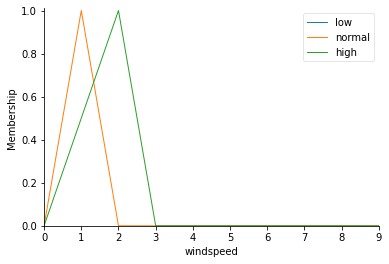

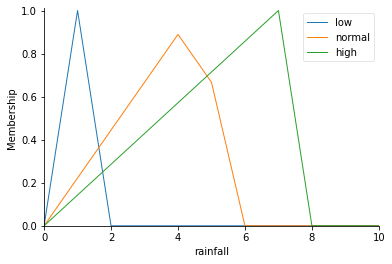

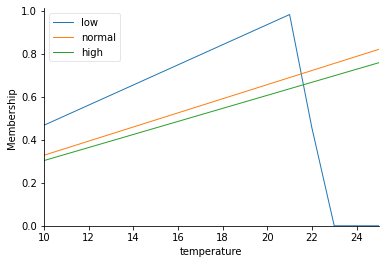

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
windspeed = ctrl.Antecedent(np.arange(0,10,1),'windspeed')
rainfall = ctrl.Antecedent(np.arange(0,11,1),'rainfall')
temperature = ctrl.Consequent(np.arange(10,26,1),'temperature')

windspeed['low']=fuzz.trimf(windspeed.universe,[0.0,0.75,0.9])
windspeed['normal']=fuzz.trimf(windspeed.universe,[0.0,1.0,1.5])
windspeed['high']=fuzz.trimf(windspeed.universe,[0.0,2.0,3.0])

rainfall['low']=fuzz.trimf(rainfall.universe,[0.0,1.0,2.0])
rainfall['normal']=fuzz.trimf(rainfall.universe,[0.0,4.5,6.0])
rainfall['high']=fuzz.trimf(rainfall.universe,[0.0,7.0,8.0])

temperature['low']=fuzz.trimf(temperature.universe,[0.0,21.4,22.5])
temperature['normal']=fuzz.trimf(temperature.universe,[0.0,30.5,32.5])
temperature['high']=fuzz.trimf(temperature.universe,[0.0,33.0,39.0])

windspeed.view()
rainfall.view()
temperature.view()

6.041598808090481


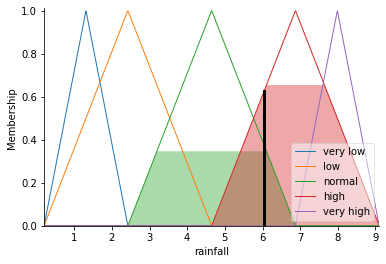

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temp = ctrl.Antecedent(np.arange(20.4, 41.2, 0.01), "temperature")
wind = ctrl.Antecedent(np.arange(0.7, 3.1, 0.01), "windspeed")
rainfall = ctrl.Consequent(np.arange(0.2, 9.1, 0.01), "rainfall")

temp["very low"] = fuzz.trimf(temp.universe, [20.4, 20.4, 25.6])
temp["low"] = fuzz.trimf(temp.universe, [20.4, 25.6, 30.8])
temp["normal"] = fuzz.trimf(temp.universe, [25.6, 30.8, 36])
temp["high"] = fuzz.trimf(temp.universe, [30.8, 36, 41.2])
temp["very high"] = fuzz.trimf(temp.universe, [36, 41.2, 41.2])

wind["very low"] = fuzz.trimf(wind.universe, [0.7, 0.7, 1.3])
wind["low"] = fuzz.trimf(wind.universe, [0.7, 1.3, 1.9])
wind["normal"] = fuzz.trimf(wind.universe, [1.3, 1.9, 2.5])
wind["high"] = fuzz.trimf(wind.universe, [1.9, 2.5, 3.1])
wind["very high"] = fuzz.trimf(wind.universe, [2.5, 3.1, 3.1])

rainfall["very low"] = fuzz.trimf(rainfall.universe, [0.2, 1.3125, 2.425])
rainfall["low"] = fuzz.trimf(rainfall.universe, [0.2, 2.425, 4.65])
rainfall["normal"] = fuzz.trimf(rainfall.universe, [2.425, 4.65, 6.875])
rainfall["high"] = fuzz.trimf(rainfall.universe, [4.65, 6.875, 9.1])
rainfall["very high"] = fuzz.trimf(rainfall.universe, [6.875, 7.9875, 9.1])

rule1 = ctrl.Rule(temp["very low"] & wind["very low"], rainfall["very low"])
rule2 = ctrl.Rule(temp["low"] & wind["very low"], rainfall["very low"])
rule3 = ctrl.Rule(temp["very low"] & wind["low"], rainfall["very low"])
rule4 = ctrl.Rule(temp["low"] & wind["low"], rainfall["very low"])

rule5 = ctrl.Rule(temp["normal"] & wind["very low"], rainfall["low"])
rule6 = ctrl.Rule(temp["high"] & wind["very low"], rainfall["low"])
rule7 = ctrl.Rule(temp["normal"] & wind["low"], rainfall["low"])
rule8 = ctrl.Rule(temp["very low"] & wind["normal"], rainfall["low"])
rule9 = ctrl.Rule(temp["low"] & wind["normal"], rainfall["low"])
rule10 = ctrl.Rule(temp["very low"] & wind["high"], rainfall["low"])

rule11 = ctrl.Rule(temp["very high"] & wind["very low"], rainfall["normal"])
rule12 = ctrl.Rule(temp["high"] & wind["low"], rainfall["normal"])
rule13 = ctrl.Rule(temp["normal"] & wind["normal"], rainfall["normal"])
rule14 = ctrl.Rule(temp["low"] & wind["high"], rainfall["normal"])
rule15 = ctrl.Rule(temp["very low"] & wind["very high"], rainfall["normal"])

rule16 = ctrl.Rule(temp["very high"] & wind["low"], rainfall["high"])
rule17 = ctrl.Rule(temp["high"] & wind["normal"], rainfall["high"])
rule18 = ctrl.Rule(temp["very high"] & wind["normal"], rainfall["high"])
rule19 = ctrl.Rule(temp["normal"] & wind["high"], rainfall["high"])
rule20 = ctrl.Rule(temp["low"] & wind["very high"], rainfall["high"])
rule21 = ctrl.Rule(temp["normal"] & wind["very high"], rainfall["high"])

rule22 = ctrl.Rule(temp["high"] & wind["high"], rainfall["very high"])
rule23 = ctrl.Rule(temp["very high"] & wind["high"], rainfall["very high"])
rule24 = ctrl.Rule(temp["high"] & wind["very high"], rainfall["very high"])
rule25 = ctrl.Rule(temp["very high"] & wind["very high"], rainfall["very high"])

rain_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,
                                   rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, 
                                   rule22, rule23, rule24, rule25])
rain = ctrl.ControlSystemSimulation(rain_ctrl)
rain.input["temperature"] = 29
rain.input["windspeed"] = 2.7
rain.compute()
print(rain.output["rainfall"])
rainfall.view(sim = rain)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Salary_Data.csv')
data.head()
data.shape






(30, 2)

In [ ]:
X = data.drop(['Salary'],axis = True)
y = data['Salary']

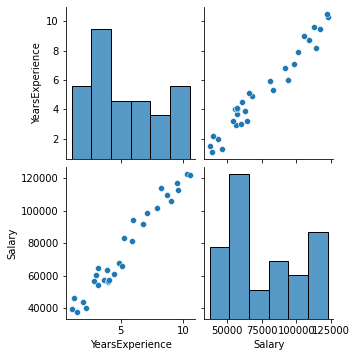

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)


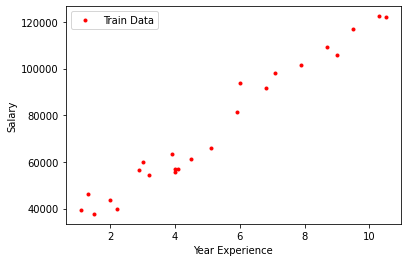

In [ ]:
plt.plot(X_train, y_train,'r.',label = 'Train Data')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).round(1)
cal = pd.DataFrame(np.c_[y_test, y_pred], columns=['Original Salary','Predicted Salary'])
cal
print('Coefient',model.coef_)
print('Intercept',model.intercept_)
print('Accurary',model.score(X_train,y_train))

Coefient [9423.81532303]
Intercept 25321.583011776813
Accurary 0.9645401573418146


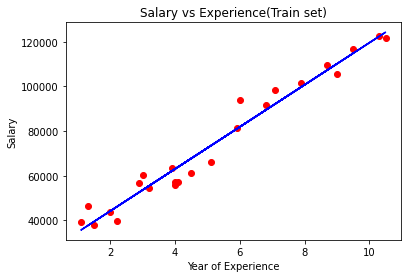

In [ ]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title('Salary vs Experience(Train set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()